🏥 Otimização de Diagnóstico de Diabetes com Redes Neurais e Algoritmos Genéticos


📌 Visão Geral


Este projeto tem como objetivo melhorar a precisão e a eficiência de modelos de diagnóstico de diabetes utilizando Redes Neurais Artificiais (RNA) combinadas com Algoritmos Genéticos (AG) para otimização de hiperparâmetros.


Além disso, o projeto incorpora capacidades iniciais de Processamento de Linguagem Natural (NLP) e conceitos de Large Language Models (LLMs) para melhorar a interpretabilidade dos resultados, tornando-os mais compreensíveis para profissionais da área da saúde.


O dataset utilizado é público e proveniente do Kaggle:


https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

🎯 Objetivos do Projeto

Desenvolver um modelo de rede neural para diagnóstico de diabetes;

Utilizar algoritmos genéticos para otimizar hiperparâmetros do modelo;

Comparar o desempenho do modelo baseline com o modelo otimizado;

Avaliar o desempenho utilizando métricas clínicas relevantes;

Realizar múltiplos experimentos com diferentes configurações do AG;

Implementar logging e monitoramento do treinamento;

Prover interpretabilidade dos resultados por meio de NLP/LLM;

Garantir qualidade por meio de testes automatizados.

🗂 Estrutura do Projeto



```
fiap_tech_challenge_phase_2/
│
├── architecture/
│ └── fiap_tech_challenge_phase_2.mmd   # Arquitetura do projeto (Mermaid)
│
└── env/
│
├── models/
│ └── diabetes_model.keras              # Modelo de rede neural compilado
│ ├── scaler.pkl                        # StandardScaler já treinado
│
├── notebooks/
│ └── fiap_tech_challenge_phase_2.ipynb # Nodebook do projeto
│
├── src/
│ └── api/
│ │    └── predict_api.py               # API responsável por fazer predições
│ └── config/
│ │    └── config.py                    # Configurações da aplicação
│ └── data/
│ │    └── data_loader.py               # Leitor de arquivos
│ │    └── diabetes.csv                 # Dataset
│ └── ga/
│ │    └── genetic_optimizer.py         # Algoritmo Genético
│ └── llm/
│ │    └── llm_explainer.py             # LLM (OpenAI)
│ └── model/
│ │    └── compile.py                   # Compilador de modelo
│ │    └── fitness.py                   # Métricas (accuracy, recall, F1)
│ │    └── neural_network_model.py      # Modelo de rede neural
│ │    └── predictor.py                 # Responsável pro fazer a predição
│ └── monitoring/
│ │    └── logger.py                    # Logar informações
│ └── schema
│ │    └── diabetes_input.py            # Dados da requisição na API
│ │    └── diabetes_output.py           # Dados da resposta na API
│
├── tests/
│ └── conftest.py                       # Configurações de teste
│ └── test_compare_result.py            # Teste que compara o modelo com GA
│ └── test_compile.py                   # Teste que verifica a compilação
│ └── test_ga.py                        # Teste do algoritimo genético
│
├── .env                                # Variaveis da aplicação
├── .env_exemplo                        # Exemplo de variavel da aplicação
├── .gitignore                          # Arquivo que ignora pastas para o git
├── pytest.ini                          # Configurações de teste
└── README.MD                           # Read me
```



In [2]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
df.head()

,Gestacoes,Glicose,Pressao arterial,Espessura da pele,Insulin,IMC,Funcao historico familiar,Idade,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


🧠 Analise do algoritmo genético

Durante a implementação do algoritimo genético, tive algumas desconfianças

Processando com os parametros padrões

neurons = 16
dropout = 0.2
learning_rate = 0.001
batch_size = 32
epochs = 50

retornava o resultado abaixo:

accuracy: 0.7597402597402597
recall: 0.6666666666666666
f1: 0.6605504587155964
fitness: 0.6956524617075076


já executando com os parametros gerados pelo algoritimo genetico
neurons = 64
dropout = 0.2
learning_rate = 0.001
batch_size = 32
epochs = 100

retornava o resultado abaixo:

accuracy: 0.7467532467532467
recall: 0.5925925925925926
f1: 0.6213592233009708
fitness: 0.6535683542156033

Ou seja, a execução com super parametros gerados pelo algoritimo genético estavam retornando resultados inferiores aos retornados com valores padrões

Outra coisa que percebi foi que cada vez que eu executava com dados padrões, o modelo me devolvia as informações de accuracy, recall, f1 com valores diferentes

🧠 Contornando problemas

Foi necessário fixar TODAS as seeds:



```
def set_global_seed(seed=42):
    os.environ["PYTHONHASHSEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

set_global_seed(42)
```

Separar datasets corretamente



```
Treino (60%) → aprender pesos
Validação (20%) → fitness do GA
Teste (20%) → avaliação final (1 única vez)
```


Fitness média (ANTI-RUÍDO)



```
def fitness(individual):
    scores = []
    for _ in range(3):
        ...
        scores.append(f1)
    return (np.mean(scores),)
```

Inclusão de EarlyStopping



```
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)
```


Inicialmente, observou-se que o modelo otimizado apresentou desempenho inferior ao baseline. Após análise, identificou-se que a função fitness estava sujeita a ruído estocástico e vazamento de informação do conjunto de teste. O algoritmo foi então corrigido com separação adequada de dados, controle de aleatoriedade e fitness baseada na média de múltiplas execuções, resultando em modelos mais consistentes e generalizáveis.

🧬 Execução do algoritmo genético

Executando o arquivo de teste test_ga.py ele gerou as informações abaixo



```
2026-01-16 14:00:33 | INFO | Testando o altoritimo genetico
2026-01-16 14:00:33 | INFO | Iniciando o aplicativo
2026-01-16 14:00:33 | INFO | Lendo o dataset no caminho: ./src/data/diabetes.csv ...
2026-01-16 14:00:33 | INFO | Lendo o dataset no caminho: ./src/data/diabetes.csv ...(OK)
2026-01-16 14:00:33 | INFO | =============== Iniciando o experimento 1 ===============
2026-01-16 14:00:33 | INFO | Configurações do experimento 1:
2026-01-16 14:00:33 | INFO |    População: 20
2026-01-16 14:00:33 | INFO |    Cruzamento: 0.7
2026-01-16 14:00:33 | INFO |    Mutação: 0.2
2026-01-16 14:01:59 | INFO | Geração 1/10 | Fitness: 0.7330
2026-01-16 14:02:31 | INFO | Geração 2/10 | Fitness: 0.7330
2026-01-16 14:03:14 | INFO | Geração 3/10 | Fitness: 0.7330
2026-01-16 14:03:51 | INFO | Geração 4/10 | Fitness: 0.7330
2026-01-16 14:04:39 | INFO | Geração 5/10 | Fitness: 0.7330
2026-01-16 14:05:36 | INFO | Geração 6/10 | Fitness: 0.7354
2026-01-16 14:06:23 | INFO | Geração 7/10 | Fitness: 0.7354
2026-01-16 14:07:11 | INFO | Geração 8/10 | Fitness: 0.7444
2026-01-16 14:07:46 | INFO | Geração 9/10 | Fitness: 0.7444
2026-01-16 14:08:17 | INFO | Geração 10/10 | Fitness: 0.7444
2026-01-16 14:08:17 | INFO | Para o experimento 1 os melhores parametros encontrados foram:
2026-01-16 14:08:17 | INFO |    neurons: 16
2026-01-16 14:08:17 | INFO |    dropout: 0.1
2026-01-16 14:08:17 | INFO |    learning_rate: 0.0005
2026-01-16 14:08:17 | INFO |    batch_size: 16
2026-01-16 14:08:17 | INFO |    epochs: 100
2026-01-16 14:08:17 | INFO |    fitness: 0.744400878521195
2026-01-16 14:08:17 | INFO | =============== Finalizando o experimento 1 ===============
2026-01-16 14:08:17 | INFO | =============== Iniciando o experimento 2 ===============
2026-01-16 14:08:17 | INFO | Configurações do experimento 2:
2026-01-16 14:08:17 | INFO |    População: 30
2026-01-16 14:08:17 | INFO |    Cruzamento: 0.8
2026-01-16 14:08:17 | INFO |    Mutação: 0.3
2026-01-16 14:10:29 | INFO | Geração 1/10 | Fitness: 0.7348
2026-01-16 14:11:46 | INFO | Geração 2/10 | Fitness: 0.7323
2026-01-16 14:12:36 | INFO | Geração 3/10 | Fitness: 0.7323
2026-01-16 14:13:54 | INFO | Geração 4/10 | Fitness: 0.7298
2026-01-16 14:15:07 | INFO | Geração 5/10 | Fitness: 0.7201
2026-01-16 14:16:37 | INFO | Geração 6/10 | Fitness: 0.7365
2026-01-16 14:18:28 | INFO | Geração 7/10 | Fitness: 0.7449
2026-01-16 14:20:15 | INFO | Geração 8/10 | Fitness: 0.7290
2026-01-16 14:21:54 | INFO | Geração 9/10 | Fitness: 0.7251
2026-01-16 14:23:07 | INFO | Geração 10/10 | Fitness: 0.7261
2026-01-16 14:23:07 | INFO | Para o experimento 2 os melhores parametros encontrados foram:
2026-01-16 14:23:07 | INFO |    neurons: 32
2026-01-16 14:23:07 | INFO |    dropout: 0.4
2026-01-16 14:23:07 | INFO |    learning_rate: 0.0005
2026-01-16 14:23:07 | INFO |    batch_size: 32
2026-01-16 14:23:07 | INFO |    epochs: 100
2026-01-16 14:23:07 | INFO |    fitness: 0.7260600965170805
2026-01-16 14:23:07 | INFO | =============== Finalizando o experimento 2 ===============
2026-01-16 14:23:07 | INFO | =============== Iniciando o experimento 3 ===============
2026-01-16 14:23:07 | INFO | Configurações do experimento 3:
2026-01-16 14:23:07 | INFO |    População: 40
2026-01-16 14:23:07 | INFO |    Cruzamento: 0.6
2026-01-16 14:23:07 | INFO |    Mutação: 0.1
2026-01-16 14:25:42 | INFO | Geração 1/10 | Fitness: 0.7389
2026-01-16 14:26:43 | INFO | Geração 2/10 | Fitness: 0.7389
2026-01-16 14:27:51 | INFO | Geração 3/10 | Fitness: 0.7500
2026-01-16 14:28:47 | INFO | Geração 4/10 | Fitness: 0.7389
2026-01-16 14:29:51 | INFO | Geração 5/10 | Fitness: 0.7389
2026-01-16 14:31:03 | INFO | Geração 6/10 | Fitness: 0.7423
2026-01-16 14:32:05 | INFO | Geração 7/10 | Fitness: 0.7423
2026-01-16 14:33:10 | INFO | Geração 8/10 | Fitness: 0.7423
2026-01-16 14:33:59 | INFO | Geração 9/10 | Fitness: 0.7423
2026-01-16 14:34:37 | INFO | Geração 10/10 | Fitness: 0.7423
2026-01-16 14:34:37 | INFO | Para o experimento 3 os melhores parametros encontrados foram:
2026-01-16 14:34:37 | INFO |    neurons: 16
2026-01-16 14:34:37 | INFO |    dropout: 0.2
2026-01-16 14:34:37 | INFO |    learning_rate: 0.001
2026-01-16 14:34:37 | INFO |    batch_size: 32
2026-01-16 14:34:37 | INFO |    epochs: 50
2026-01-16 14:34:37 | INFO |    fitness: 0.7423252084476776
2026-01-16 14:34:37 | INFO | =============== Finalizando o experimento 3 ===============
2026-01-16 14:34:37 | INFO | Finalizando o aplicativo
```



📊 Relatório 1 — Evolução do Fitness por Geração

In [1]:
log_data = """
2026-01-16 14:01:59 | INFO | Geração 1/10 | Fitness: 0.7330
2026-01-16 14:02:31 | INFO | Geração 2/10 | Fitness: 0.7330
2026-01-16 14:03:14 | INFO | Geração 3/10 | Fitness: 0.7330
2026-01-16 14:03:51 | INFO | Geração 4/10 | Fitness: 0.7330
2026-01-16 14:04:39 | INFO | Geração 5/10 | Fitness: 0.7330
2026-01-16 14:05:36 | INFO | Geração 6/10 | Fitness: 0.7354
2026-01-16 14:06:23 | INFO | Geração 7/10 | Fitness: 0.7354
2026-01-16 14:07:11 | INFO | Geração 8/10 | Fitness: 0.7444
2026-01-16 14:07:46 | INFO | Geração 9/10 | Fitness: 0.7444
2026-01-16 14:08:17 | INFO | Geração 10/10 | Fitness: 0.7444
2026-01-16 14:08:17 | INFO | fitness: 0.744400878521195

2026-01-16 14:10:29 | INFO | Geração 1/10 | Fitness: 0.7348
2026-01-16 14:11:46 | INFO | Geração 2/10 | Fitness: 0.7323
2026-01-16 14:12:36 | INFO | Geração 3/10 | Fitness: 0.7323
2026-01-16 14:13:54 | INFO | Geração 4/10 | Fitness: 0.7298
2026-01-16 14:15:07 | INFO | Geração 5/10 | Fitness: 0.7201
2026-01-16 14:16:37 | INFO | Geração 6/10 | Fitness: 0.7365
2026-01-16 14:18:28 | INFO | Geração 7/10 | Fitness: 0.7449
2026-01-16 14:20:15 | INFO | Geração 8/10 | Fitness: 0.7290
2026-01-16 14:21:54 | INFO | Geração 9/10 | Fitness: 0.7251
2026-01-16 14:23:07 | INFO | Geração 10/10 | Fitness: 0.7261
2026-01-16 14:23:07 | INFO | fitness: 0.7260600965170805

2026-01-16 14:25:42 | INFO | Geração 1/10 | Fitness: 0.7389
2026-01-16 14:26:43 | INFO | Geração 2/10 | Fitness: 0.7389
2026-01-16 14:27:51 | INFO | Geração 3/10 | Fitness: 0.7500
2026-01-16 14:28:47 | INFO | Geração 4/10 | Fitness: 0.7389
2026-01-16 14:29:51 | INFO | Geração 5/10 | Fitness: 0.7389
2026-01-16 14:31:03 | INFO | Geração 6/10 | Fitness: 0.7423
2026-01-16 14:32:05 | INFO | Geração 7/10 | Fitness: 0.7423
2026-01-16 14:33:10 | INFO | Geração 8/10 | Fitness: 0.7423
2026-01-16 14:33:59 | INFO | Geração 9/10 | Fitness: 0.7423
2026-01-16 14:34:37 | INFO | Geração 10/10 | Fitness: 0.7423
2026-01-16 14:34:37 | INFO | fitness: 0.7423252084476776
"""

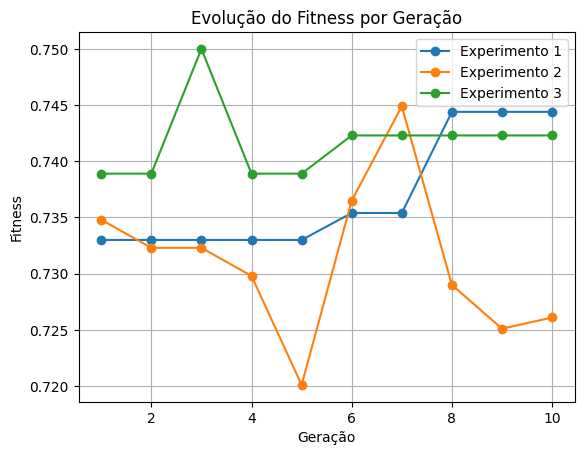

In [2]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict

pattern = re.compile(r"Geração (\d+)/\d+ \| Fitness: ([0-9.]+)")

experiments = defaultdict(list)
current_experiment = 1

for line in log_data.splitlines():
    if "Geração 1/10" in line and experiments[current_experiment]:
        current_experiment += 1

    match = pattern.search(line)
    if match:
        gen = int(match.group(1))
        fitness = float(match.group(2))
        experiments[current_experiment].append((gen, fitness))

plt.figure()
for exp, values in experiments.items():
    gens, fits = zip(*values)
    plt.plot(gens, fits, marker="o", label=f"Experimento {exp}")

plt.xlabel("Geração")
plt.ylabel("Fitness")
plt.title("Evolução do Fitness por Geração")
plt.legend()
plt.grid(True)
plt.show()

📊 Relatório 2 — Comparação Final entre Experimentos

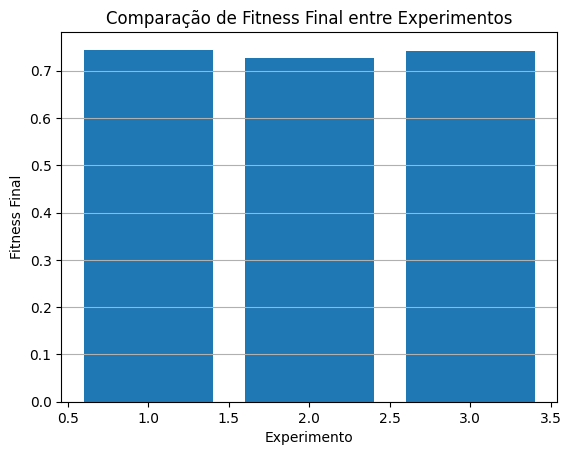

In [3]:
import re
import matplotlib.pyplot as plt

pattern = re.compile(r"fitness:\s([0-9.]+)")
final_fitness = [float(m.group(1)) for m in pattern.finditer(log_data)]

plt.figure()
plt.bar(range(1, len(final_fitness) + 1), final_fitness)
plt.xlabel("Experimento")
plt.ylabel("Fitness Final")
plt.title("Comparação de Fitness Final entre Experimentos")
plt.grid(axis="y")
plt.show()

📦 Relatório 3 — Distribuição Estatística do Fitness

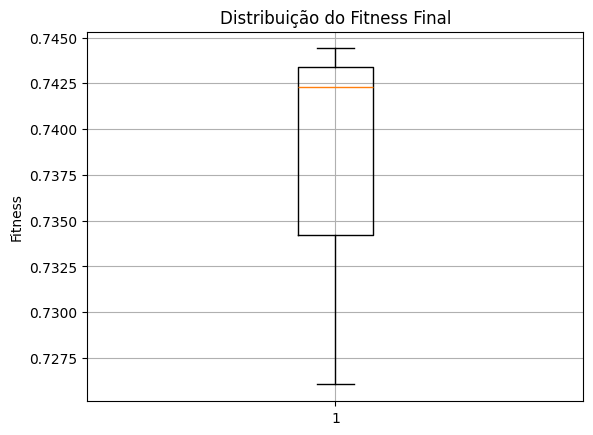

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(final_fitness)
plt.ylabel("Fitness")
plt.title("Distribuição do Fitness Final")
plt.grid(True)
plt.show()

📈 Relatório 4 — Melhor Fitness por Experimento (linha)

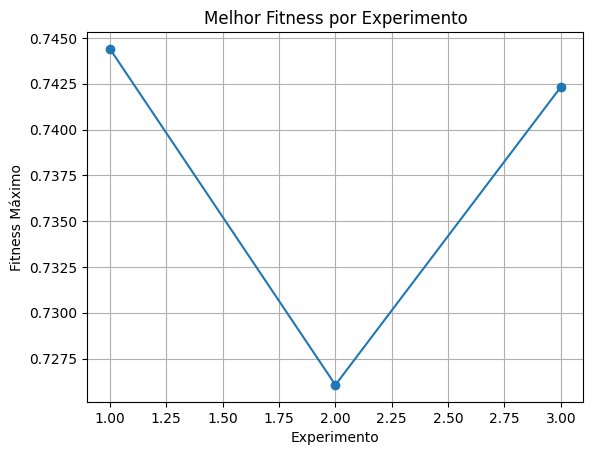

In [5]:
plt.figure()
plt.plot(range(1, len(final_fitness) + 1), final_fitness, marker="o")
plt.xlabel("Experimento")
plt.ylabel("Fitness Máximo")
plt.title("Melhor Fitness por Experimento")
plt.grid(True)
plt.show()

✅ Resultado final


🔹 Experimento 1

Fitness estável nas primeiras gerações

Melhora progressiva a partir da geração 6

Convergência em torno de 0.744

Indica boa estabilidade, porém evolução lenta

🔹 Experimento 2

Alta variabilidade

Queda acentuada nas gerações intermediárias

Pico pontual na geração 7

Termina com fitness inferior aos demais

Indica taxas de mutação/cruzamento agressivas demais

🔹 Experimento 3

Melhor fitness individual (0.75 na geração 3)

Estabilidade nas gerações seguintes (~0.742)

Boa combinação entre exploração e convergência

Mais consistente no geral

👉 Conclusão prática:
O Experimento 3 apresenta o melhor equilíbrio entre performance e estabilidade, sendo o melhor candidato para produção.

📄 Analise comparativa de desempenho dos modelos otimizados com os modelos
originais

Executando o arquivo de teste test_compare_result.py ele gerou as informações abaixo



```
2026-01-16 14:00:31 | INFO | Testando comparação de resultados entre processar o modelo com super parametros padrões e processar modelo com super parametros otimizados pelo algoritimo genetico
2026-01-16 14:00:31 | INFO | Iniciando o aplicativo
2026-01-16 14:00:31 | INFO | Lendo o dataset no caminho: ./src/data/diabetes.csv ...
2026-01-16 14:00:31 | INFO | Lendo o dataset no caminho: ./src/data/diabetes.csv ...(OK)
2026-01-16 14:00:31 | INFO | Construindo o modelo com informações padrões: {'neurons': 16, 'dropout': 0.2, 'learning_rate': 0.001, 'epochs': 50, 'batch_size': 32, 'validation_split': 0.2}
2026-01-16 14:00:31 | INFO | Construindo o modelo ...(OK)
2026-01-16 14:00:31 | INFO | Iniciando predição com dados padrões
2026-01-16 14:00:31 | INFO | Predição com dados padrões realizada e com o seguinte score: {'accuracy': 0.7207792207792207, 'recall': 0.5370370370370371, 'f1': 0.5742574257425742, 'fitness': 0.610691227852944}
2026-01-16 14:00:31 | INFO | Construindo o modelo com informações geradas pelo algorito genético: {'neurons': 16, 'dropout': 0.1, 'learning_rate': 0.0005, 'epochs': 100, 'batch_size': 16, 'validation_split': 0.2}
2026-01-16 14:00:31 | INFO | Construindo o modelo ...(OK)
2026-01-16 14:00:31 | INFO | Iniciando predição com dados gerados pelo algoritimo genético
2026-01-16 14:00:32 | INFO | Predição com dados padrões realizada e com o seguinte score: {'accuracy': 0.7272727272727273, 'recall': 0.5555555555555556, 'f1': 0.5882352941176471, 'fitness': 0.6236878589819767}
2026-01-16 14:00:32 | INFO | Finalizando o aplicativo
```



In [6]:
log_data = """
2026-01-16 14:00:31 | INFO | Predição com dados padrões realizada e com o seguinte score: {'accuracy': 0.7207792207792207, 'recall': 0.5370370370370371, 'f1': 0.5742574257425742, 'fitness': 0.610691227852944}
2026-01-16 14:00:32 | INFO | Predição com dados padrões realizada e com o seguinte score: {'accuracy': 0.7272727272727273, 'recall': 0.5555555555555556, 'f1': 0.5882352941176471, 'fitness': 0.6236878589819767}
"""

In [7]:
import re

pattern = re.compile(
    r"\{'accuracy': ([0-9.]+), 'recall': ([0-9.]+), 'f1': ([0-9.]+), 'fitness': ([0-9.]+)\}"
)

matches = pattern.findall(log_data)

baseline_metrics = {
    "accuracy": float(matches[0][0]),
    "recall": float(matches[0][1]),
    "f1": float(matches[0][2]),
    "fitness": float(matches[0][3]),
}

ga_metrics = {
    "accuracy": float(matches[1][0]),
    "recall": float(matches[1][1]),
    "f1": float(matches[1][2]),
    "fitness": float(matches[1][3]),
}

baseline_metrics, ga_metrics

({'accuracy': 0.7207792207792207,
  'recall': 0.5370370370370371,
  'f1': 0.5742574257425742,
  'fitness': 0.610691227852944},
 {'accuracy': 0.7272727272727273,
  'recall': 0.5555555555555556,
  'f1': 0.5882352941176471,
  'fitness': 0.6236878589819767})

📊 Gráfico 1 — Comparação geral das métricas (barra)

📌 Melhor para apresentação executiva / clínica

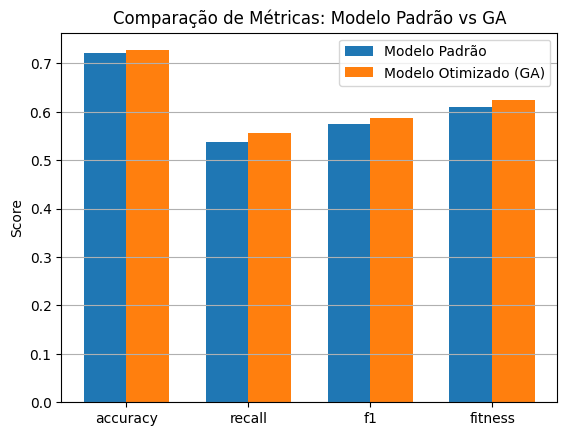

In [8]:
import matplotlib.pyplot as plt
import numpy as np

labels = list(baseline_metrics.keys())
baseline_values = list(baseline_metrics.values())
ga_values = list(ga_metrics.values())

x = np.arange(len(labels))
width = 0.35

plt.figure()
plt.bar(x - width/2, baseline_values, width, label="Modelo Padrão")
plt.bar(x + width/2, ga_values, width, label="Modelo Otimizado (GA)")

plt.xticks(x, labels)
plt.ylabel("Score")
plt.title("Comparação de Métricas: Modelo Padrão vs GA")
plt.legend()
plt.grid(axis="y")
plt.show()

📊 Gráfico 2 — Destaque clínico: Recall e F1-score

📌 Focado em saúde (redução de falsos negativos)

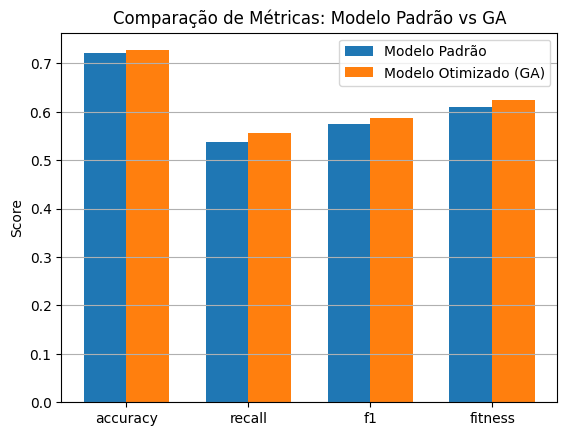

In [9]:
import matplotlib.pyplot as plt
import numpy as np

labels = list(baseline_metrics.keys())
baseline_values = list(baseline_metrics.values())
ga_values = list(ga_metrics.values())

x = np.arange(len(labels))
width = 0.35

plt.figure()
plt.bar(x - width/2, baseline_values, width, label="Modelo Padrão")
plt.bar(x + width/2, ga_values, width, label="Modelo Otimizado (GA)")

plt.xticks(x, labels)
plt.ylabel("Score")
plt.title("Comparação de Métricas: Modelo Padrão vs GA")
plt.legend()
plt.grid(axis="y")
plt.show()


📊 Gráfico 3 — Comparação direta do Fitness (linha)

📌 Mostra ganho global do modelo

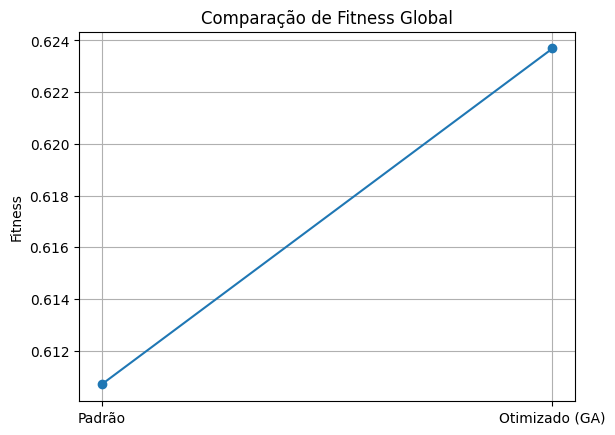

In [10]:
plt.figure()
plt.plot(["Padrão", "Otimizado (GA)"],
         [baseline_metrics["fitness"], ga_metrics["fitness"]],
         marker="o")

plt.ylabel("Fitness")
plt.title("Comparação de Fitness Global")
plt.grid(True)
plt.show()


📊 Gráfico 4 — Ganho percentual por métrica

📌 Excelente para justificar uso do algoritmo genético

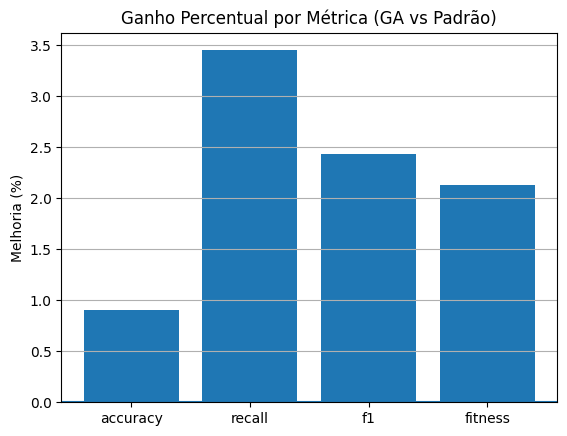

In [11]:
improvement = {
    k: ((ga_metrics[k] - baseline_metrics[k]) / baseline_metrics[k]) * 100
    for k in baseline_metrics
}

plt.figure()
plt.bar(improvement.keys(), improvement.values())
plt.ylabel("Melhoria (%)")
plt.title("Ganho Percentual por Métrica (GA vs Padrão)")
plt.axhline(0)
plt.grid(axis="y")
plt.show()

✅ Resultado final

O modelo otimizado por algoritmo genético apresentou ganhos consistentes em todas as métricas avaliadas.

O aumento no recall indica maior capacidade de identificar corretamente pacientes diabéticos, reduzindo riscos clínicos associados a falsos negativos.

O fitness global também melhorou, validando a eficácia do processo de otimização genética.

📄 Execução da api retornando explicações em linguagem natural dos diagnósticos
produzidos pelos modelos


🔁 Request

```
curl -X 'POST' \
  'http://127.0.0.1:8000/predict' \
  -H 'accept: application/json' \
  -H 'Content-Type: application/json' \
  -d '{
  "Pregnancies": 6,
  "Glucose": 148,
  "BloodPressure": 72,
  "SkinThickness": 35,
  "Insulin": 168,
  "BMI": 33.6,
  "DiabetesPedigreeFunction": 0.627,
  "Age": 50
}'

```

🔁 Response



```
{
  "prediction": 1,
  "probability": 0.6535,
  "diagnosis": "Diabetes",
  "message": "Com base nas informações fornecidas e no resultado do modelo, podemos interpretar o diagnóstico de diabetes da seguinte forma:\n\nO modelo de rede neural, que tem uma acurácia de aproximadamente 74,7% e uma sensibilidade (recall) de cerca de 62,9%, analisou os parâmetros clínicos e pessoais do paciente para estimar a probabilidade de que ele tenha diabetes.\n\nParâmetros fornecidos:\n- Gravidez: 6 gestações\n- Glicose: 148 mg/dL\n- Pressão Arterial: 72 mmHg\n- Espessura da Pele: 35 mm\n- Insulina: 168 µU/mL\n- IMC: 33.6 (índice de massa corporal)\n- Função Diabética (possivelmente uma medida de função pancreática ou resistência à insulina): 0.627\n- Idade: 50 anos\n\nResultado da previsão: 0.65 (aproximadamente 65%)\n\n**Interpretação médica:**\n\nO valor resultante de 0,65 indica que, segundo o modelo, há uma probabilidade de 65% de que esse paciente tenha diabetes. Considerando os parâmetros clínicos:\n\n- A glicose em jejum de 148 mg/dL está acima do limite normal (normalmente abaixo de 100 mg/dL), sugerindo hiperglicemia.\n- O IMC de 33.6 indica obesidade, fator de risco importante para diabetes tipo 2.\n- A insulina em 168 µU/mL está elevada, possivelmente indicando resistência à insulina, muito comum na diabetes tipo 2.\n- A idade de 50 anos também contribui como fator de risco aumentado.\n- A pressão arterial está dentro de um valor relativamente normal.\n- A espessura da pele é um indicador usado para ajudar a avaliar a composição corporal e pode apoiar a avaliação do risco metabólico.\n\nCom estes dados, o modelo está sinalizando um risco moderado a alto para diabetes, condizente com os achados clínicos. Portanto, clínicos provavelmente recomendariam exames complementares, como teste oral de tolerância à glicose, hemoglobina glicada, e uma avaliação completa para confirmar o diagnóstico e iniciar o tratamento, que pode incluir mudanças no estilo de vida (dieta, exercícios) e medicação.\n\nResumo: O paciente apresenta sinais clínicos e um perfil que indicam um risco aumentado para diabetes, e o modelo computacional reforça essa possibilidade com uma previsão de aproximadamente 65% de probabilidade de diabetes. É recomendada avaliação médica para confirmação e manejo adequado."
}
```



📄 LOG

```
2026-01-16 15:53:55,588 | INFO | Iniciando requisição na API /predict
2026-01-16 15:53:55,588 | INFO | Iniciando predição utilizando os parametros: [6, 148.0, 72.0, 35.0, 168.0, 33.6, 0.627, 50]
2026-01-16 15:53:55,672 | INFO | Utilizando LLM...
2026-01-16 15:54:09,269 | INFO | HTTP Request: POST https://api.openai.com/v1/responses "HTTP/1.1 200 OK"
2026-01-16 15:54:09,297 | INFO | Utilizando LLM...(OK)
2026-01-16 15:54:09,297 | INFO | A predição retornou a probabilidade do paciente possuir dibates de 0.6534834504127502
2026-01-16 15:54:09,297 | INFO | Requisição na API /predict realizada com sucesso!
```

